# 5. 인공신경망
## 5.1 다층 퍼셉트론
### 5.1.1 선형 회귀

In [1]:
import torch
import torch.nn as nn    # torch.nn 신경망을 생성하는 라이브러리
from matplotlib import pyplot as plt

In [9]:
x = torch.FloatTensor(range(5)).unsqueeze(1)   # unsqueeze 차원을 증가
y = 2*x + torch.rand(5,1)
print(x)
print(y)


tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
tensor([[0.4620],
        [2.6041],
        [4.5990],
        [6.0959],
        [8.0560]])


In [10]:
class LinearRegressor(nn.Module):  # nn.Module을 상속받는 클래스 linearRegressor을 만든다.
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.fc = nn.Linear(1, 1, bias=True)   # nn.Linear(N, M, bias=True) = 선형회귀 모델 y = wx+b를 표현
                                               # N = 입력 변수 x ,  M = 출력 변수 y
    
    def forward(self, x):  # 연산이 진행하는 순서와 방법을 정하는 곳
        y = self.fc(x)
      
        return y  

In [12]:
model = LinearRegressor()  # 모델 선언

In [13]:
learning_rate = 1e-3
criterion = nn.MSELoss()    # 손실 함수 설정
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # optimizer 설정

In [14]:
loss_stack = []
for epoch in range(1001):
    
    optimizer.zero_grad()  # 최적화는 계산을 누적시키기 때문에 매 에폭마다 누적된 값을 초기화 함
    
    y_hat = model(x)   
    loss = criterion(y_hat,y)
    
    loss.backward()    # 역전파의 기준을 손실 함수로 정한다.
    optimizer.step() 
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:24.20212173461914
Epoch 100:1.6942660808563232
Epoch 200:0.17474137246608734
Epoch 300:0.06807072460651398
Epoch 400:0.0569683201611042
Epoch 500:0.05273839086294174
Epoch 600:0.04936286434531212
Epoch 700:0.04639269784092903
Epoch 800:0.04375866428017616
Epoch 900:0.04142113775014877
Epoch 1000:0.039346709847450256


In [15]:
with torch.no_grad():
    y_hat = model(x)

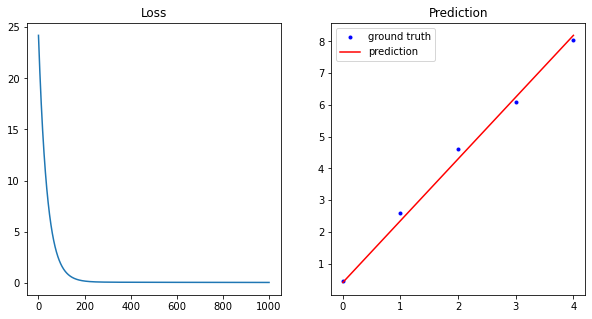

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()